In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [63]:
df = pd.read_csv('results.csv', sep=';')
df.head()

,Name,OriginalSize,BxesSize,BxesPreprocessing,ZipSize,BxesToXesSize,ExiSize
0,CCC19 - Log XES,806604,21732,21166,26474,784533,21653
1,not_existing_assembly_loading_50,69765356,1398690,1370231,3031019,68701568,1496488
2,unsafe_fixed_50,24518888,414890,404778,1132204,23971780,535439
3,task_test_project_50,97435590,1831234,1800133,4166718,95865257,1983930
4,intensive_thread_pool_25,553313386,11488539,11184277,14753209,535664692,10882575


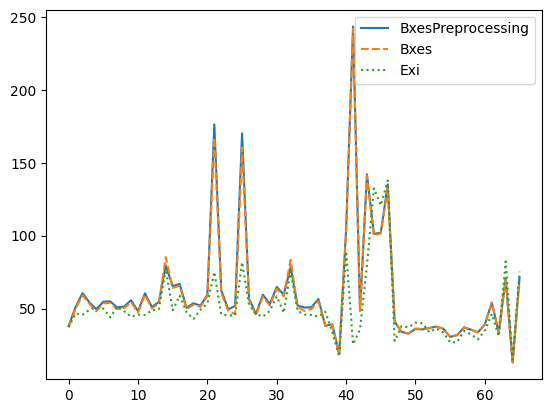

In [68]:
x = [x for x in range(len(df['BxesSize'].to_numpy()))]

bxes_line = df['OriginalSize'].to_numpy() / df['BxesSize'].to_numpy()
bxes_preprocessing = df['OriginalSize'].to_numpy() / df['BxesPreprocessing'].to_numpy()
exi = df['OriginalSize'].to_numpy() / df['ExiSize'].to_numpy()

plt.plot(x, bxes_preprocessing, label='BxesPreprocessing')
plt.plot(x, bxes_line, label='Bxes', linestyle='--')
plt.plot(x, exi, label='Exi', linestyle=':')
plt.legend()
plt.show()

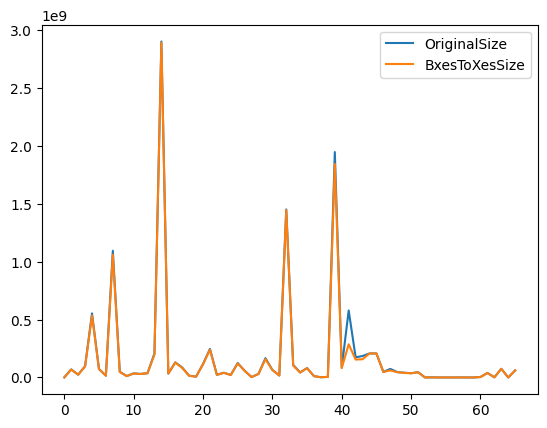

In [70]:
plt.plot(x, df['OriginalSize'], label='OriginalSize')
plt.plot(x, df['BxesToXesSize'], label='BxesToXesSize')
plt.legend()
plt.show()

In [71]:
print(f'Exi-BxesPreprocessing {scipy.stats.ttest_rel(exi, bxes_preprocessing)}')
print(f'Exi-Bxes {scipy.stats.ttest_rel(exi, bxes_line)}')
print(f'Bxes mean: {np.mean(bxes_line)}')
print(f'BxesPreprocessing mean: {np.mean(bxes_preprocessing)}')
print(f'Exi: {np.mean(exi)}')

Exi-BxesPreprocessing TtestResult(statistic=-2.6328212353521856, pvalue=0.010568674934299742, df=65)
Exi-Bxes TtestResult(statistic=-2.4547691466315467, pvalue=0.016783344201411397, df=65)
Bxes mean: 59.8727036584317
BxesPreprocessing mean: 60.80696728779693
Exi: 50.393631301440315
